In [18]:
#Defendencies
import pandas as pd
from pathlib import Path
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

pd.set_option('display.max_columns', None)

In [19]:
#Use Panda to read Data
crash_data = pd.read_csv("Resources/Cleaned_accidents_dataset.csv")
crash_data

,Incident_ID,Year,Street_Name,Cross_Street,Distance,Junction_Relation,Total_Injuries,Total_Fatalities,Injury_Severity,Collision_Manner,Light_Condition,Weather,Surface_Condition,Age_1,Gender_1,Travel_One,UnitAction_One,Violation1_Drv1,AlcoholUse_ 1,DrugUse_1,Age_2,Gender_2,TravelDirection_2,UnitAction_2,Violation_2,AlcoholUse_2,DrugUse_2,Latitude,Longitude,Date,Time
0,3462432,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Wet,36.0,Male,East,Changing Lanes,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.407390,-111.940150,2019-01-01,12:24:00
1,3470825,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Daylight,Rain,Dry,27.0,Male,North,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.378300,-111.967380,2019-01-01,18:39:00
2,3478968,2019,University Dr,Rural Rd,200.0,Not Junction Related,0.0,0.0,No Injury,Left Turn,Dusk,Clear,Dry,28.0,Male,East,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,26.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.422030,-111.925660,2019-01-02,01:14:00
3,3470739,2019,McClintock Dr,Baseline Rd,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Left Turn,Dark Lighted,Clear,Dry,72.0,Female,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,36.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.378420,-111.909260,2019-01-02,02:22:00
4,3470724,2019,Baseline Rd,Price Rd,-29.0,Intersection Related 206,0.0,0.0,No Injury,Rear End,Daylight,Clear,Dry,36.0,Male,East,Making Right Turn,Followed Too Closely,No Apparent Influence,No Apparent Influence,62.0,Male,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.378460,-111.893710,2019-01-02,18:54:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7585,4017365,2022,Broadway Rd,Hardy Dr,-74.0,Intersection Related 206,0.0,0.0,No Injury,Rear End,Dusk,Cloudy,Dry,19.0,Male,East,Going Straight Ahead,Followed Too Closely,No Apparent Influence,No Apparent Influence,28.0,Male,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.407394,-111.952407,2022-12-31,01:48:00
7586,4047744,2022,Ash Ave,Rio Salado Pkwy,-15.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Opposite Direction,Dark Lighted,Clear,Dry,17.0,Female,South,Making Right Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,47.0,Male,North,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.431508,-111.943378,2022-12-31,05:08:00
7587,4017542,2022,Elliot Rd,Harl Ave,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Left Turn,Unknown 51,Unknown,Dry,28.0,Male,East,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,50.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.349081,-111.965928,2022-12-31,15:47:00
7588,4017552,2022,Mill Ave,Southern Ave,100.0,Driveway Or Alley,0.0,0.0,No Injury,Other,Daylight,Clear,Dry,23.0,Male,East,Backing,Other,No Apparent Influence,No Apparent Influence,46.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.393137,-111.939610,2022-12-31,21:55:00


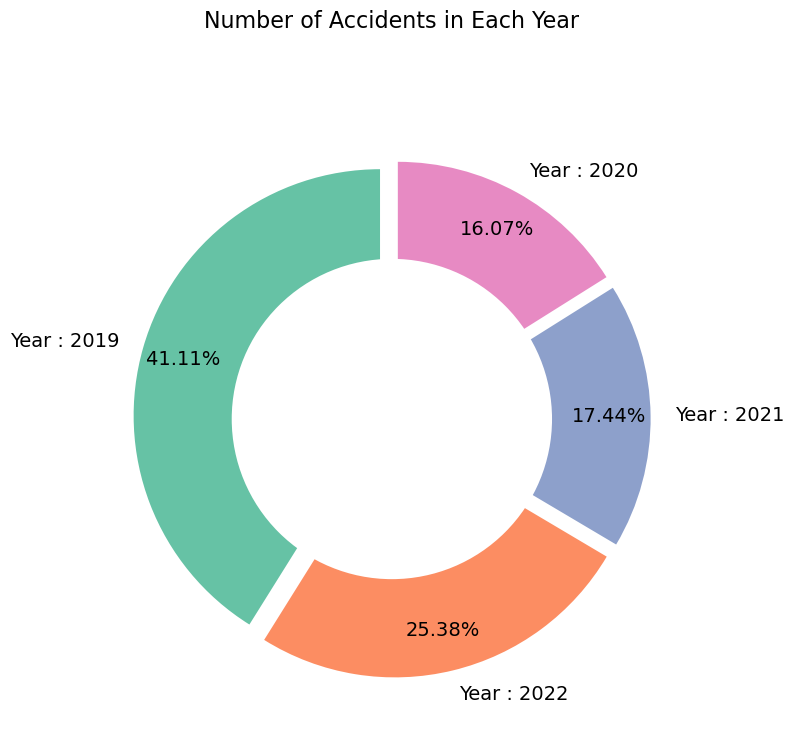

In [20]:
year_counts = crash_data['Year'].value_counts()
years_labels = ["Year : " + str(year) for year in year_counts.index]

# Create a pie chart 
plt.figure(figsize=(8,8))
plt.pie(year_counts, labels=years_labels, 
    autopct='%1.2f%%',
       textprops={'fontsize': 14},
       pctdistance=0.83,
       colors= sns.color_palette('Set2'), 
       startangle=90,
       explode=[0.05, 0.05, 0.05, 0.05])
plt.title(
    label="Number of Accidents in Each Year",
    fontdict={"fontsize": 16},
    pad=60
)

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.show()

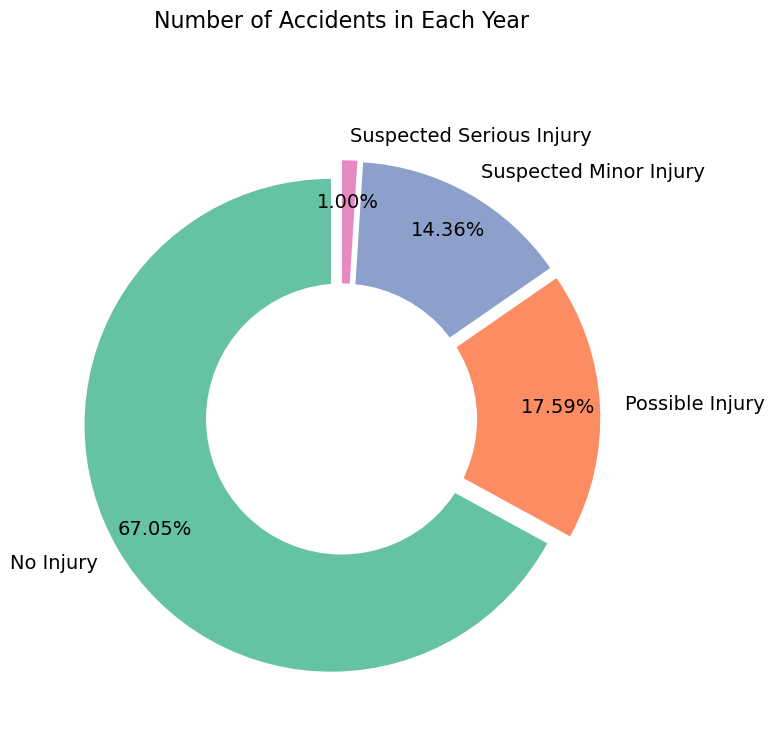

In [21]:
injury_Severity = crash_data['Injury_Severity'].value_counts()

# Create a pie chart 
plt.figure(figsize=(8,8))
plt.pie(injury_Severity, labels=injury_Severity.index, 
    autopct='%1.2f%%',
       textprops={'fontsize': 14},
       pctdistance=0.83,
       colors= sns.color_palette('Set2'), 
       startangle=90,
       explode=[0.05, 0.05, 0.05, 0.05])
plt.title(
    label="Number of Accidents in Each Year",
    fontdict={"fontsize": 16},
    pad=60
)

hole = plt.Circle((0, 0), 0.55, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.show()

---

The weather conditions do not not play a significant role in determining collision manner. Other factors such as road conditons, or time of day may have more influence

---

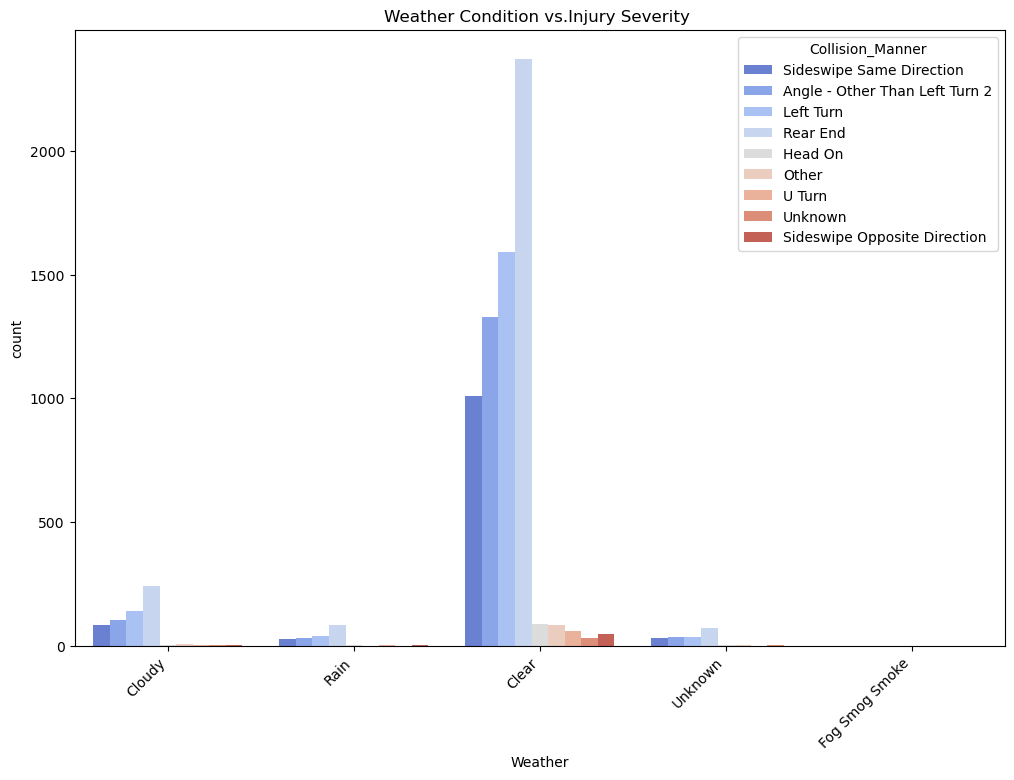

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(x='Weather', hue='Collision_Manner', data=crash_data, palette ='coolwarm')
plt.title('Weather Condition vs.Injury Severity ')
plt.xticks(rotation=45, ha='right')
plt.show()

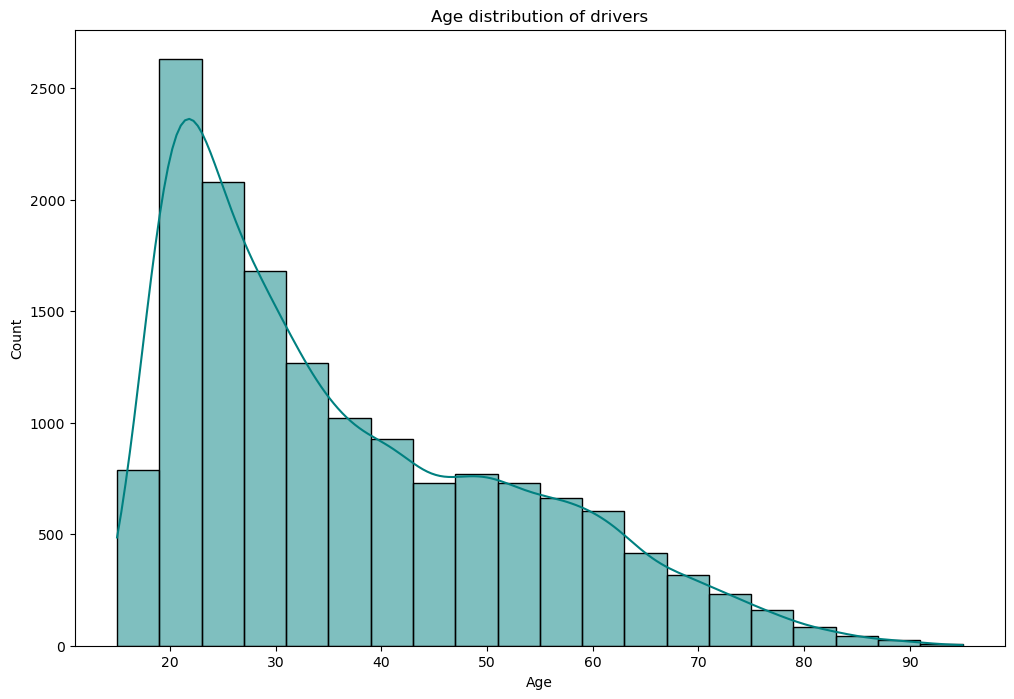

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(crash_data[['Age_1', 'Age_2']].stack(), color='teal', bins=20, kde=True)
plt.title('Age distribution of drivers')
plt.xlabel('Age')
plt.show()

---

Positive correlations (values close to 1) suggest that as one variable increases, the other tends to increase as well.
Negative correlations (values close to -1) indicate that as one variable increases, the other tends to decrease.

---

In [24]:
# Count total injuries and fatalities
# Use the following to calculate the percentage of injuries and fatalities

injuries_fatalities = crash_data.loc[(crash_data["Total_Injuries"] > 0) | (crash_data["Total_Fatalities"] > 0)]

total_injuries = injuries_fatalities.groupby(["Year"]).sum()
total_injuries_df = total_injuries[["Total_Injuries", "Total_Fatalities"]]

total_accident_by_year = crash_data.groupby(["Year"]).count()["Incident_ID"]
total_injuries_df["Total accidents"] = total_accident_by_year

total_injuries_df["%Injuries Percentage"] = ""
total_injuries_df["%Fatalities Percentage"] = ""

for i in range(len(total_injuries_df)):
    injuries_count = total_injuries_df.iloc[i]["Total_Injuries"]
    fatalities_count = total_injuries_df.iloc[i]["Total_Fatalities"]

    total_injuries_df.iloc[i, total_injuries_df.columns.get_loc("%Injuries Percentage")] = round(
        (injuries_count / float(total_injuries_df.iloc[i]["Total accidents"]) * 100), 2)
    total_injuries_df.iloc[i, total_injuries_df.columns.get_loc("%Fatalities Percentage")] = round(
        (fatalities_count / float(total_injuries_df.iloc[i]["Total accidents"]) * 100), 2)

total_injuries_df

,Total_Injuries,Total_Fatalities,Total accidents,%Injuries Percentage,%Fatalities Percentage
Year,,,,,
2019,1156.0,0.0,3120,37.05,0.0
2020,621.0,0.0,1220,50.9,0.0
2021,745.0,0.0,1324,56.27,0.0
2022,824.0,0.0,1926,42.78,0.0


In [25]:
#Count total data who use alcohol
cause_accident_by_alcohol=crash_data.loc[(crash_data["AlcoholUse_ 1"]== "Alcohol")]
cause_accident_by_Drug=crash_data.loc[(crash_data["DrugUse_1"]== "Drug")]
total_injuries_df["AlcoholUse_ 1"]=cause_accident_by_alcohol.groupby(["Year"]).count()["AlcoholUse_ 1"]
total_injuries_df["DrugUse_1"]=cause_accident_by_Drug.groupby(["Year"]).count()["DrugUse_1"]
total_injuries_df["%AlcoholUse_Percentage"] = ""
total_injuries_df["%DrugUse_Percentage"] = ""

for M in range(len(total_injuries_df)):
    Alcohol_count = total_injuries_df.iloc[M]["AlcoholUse_ 1"]
    Drug_count = total_injuries_df.iloc[M]["AlcoholUse_ 1"]
    total_injuries_df.iloc[M, total_injuries_df.columns.get_loc("%AlcoholUse_Percentage")] = round(
                        (Alcohol_count / float(total_injuries_df.iloc[i]["Total accidents"]) * 100), 4)
    total_injuries_df.iloc[M, total_injuries_df.columns.get_loc("%DrugUse_Percentage")] = round(
                        (Drug_count / float(total_injuries_df.iloc[i]["Total accidents"]) * 100), 4)


total_injuries_df

,Total_Injuries,Total_Fatalities,Total accidents,%Injuries Percentage,%Fatalities Percentage,AlcoholUse_ 1,DrugUse_1,%AlcoholUse_Percentage,%DrugUse_Percentage
Year,,,,,,,,,
2019,1156.0,0.0,3120,37.05,0.0,81,NaN,4.2056,4.2056
2020,621.0,0.0,1220,50.9,0.0,54,NaN,2.8037,2.8037
2021,745.0,0.0,1324,56.27,0.0,93,NaN,4.8287,4.8287
2022,824.0,0.0,1926,42.78,0.0,98,NaN,5.0883,5.0883


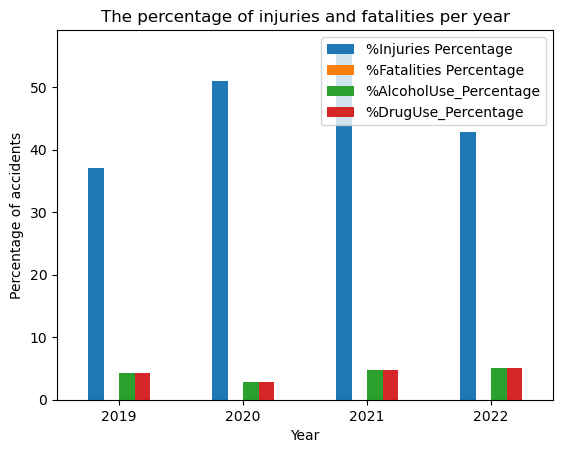

In [26]:
#Generate a bar plot showing the percentage of injuries and fatalies per year.
Figure_injuries_year = total_injuries_df[["%Injuries Percentage", "%Fatalities Percentage",
                                         "%AlcoholUse_Percentage", "%DrugUse_Percentage"]].plot(
                                        kind="bar", xlabel="Year", ylabel="Percentage of accidents", rot=0)

plt.title("The percentage of injuries and fatalities per year")
plt.savefig("output/year and accident.png")
plt.show()

In [27]:
#now we want to found people who use alcohol 
# Create bins for age groups
bins = [15, 25, 35, 45, 55, 65, 75, 85, 90]
labels = ['Age 15-25', 'Age 25-35', 'Age 35-45', 'Age 45-55', 'Age 55-65', 'Age 65-75', 'Age 75-85', 'Age 85-95']

# Create a new column 'AgeGroup' based on the bins
crash_data['AgeGroup'] = pd.cut(crash_data['Age_1'], bins=bins, labels=labels, right=False)

# Create a new column 'AlcoholUse' based on the combination of 'alcoholuse'
crash_data['AlcoholUse_ 1'] = crash_data['AlcoholUse_ 1']

# Group by 'AgeGroup' and 'AlcoholUse', then count occurrences
age_and_alcohol_counts = crash_data.groupby(['AgeGroup', 'AlcoholUse_ 1']).size().unstack()
age_and_Drug_counts = crash_data.groupby(['AgeGroup', 'DrugUse_1']).size().unstack()

# Group by 'AgeGroup' and count injuries
injuries_by_age = crash_data.groupby('AgeGroup')['Total_Injuries'].sum().reset_index()

# Rename the columns for clarity
age_and_alcohol_counts.columns = [f"{col} Count" for col in age_and_alcohol_counts.columns]
age_and_Drug_counts.columns = [f"{col} Count" for col in age_and_Drug_counts.columns]
injuries_by_age.columns = ['AgeGroup', 'Total_Injuries']

# Reset index for a cleaner DataFrame
age_and_alcohol_counts.reset_index(inplace=True)

# Display the result
merged_df = pd.merge(age_and_alcohol_counts, age_and_Drug_counts, on='AgeGroup', how='outer', suffixes=('_Alcohol', '_Drug'))
#merged_injuries_df= pd.merge(merged_df, age_and_injuries_counts, on='AgeGroup', how='outer')
merged_df["Total Injuries"]= injuries_by_age["Total_Injuries"]
merged_df

,AgeGroup,Alcohol Count,No Apparent Influence Count_Alcohol,Drugs Count,No Apparent Influence Count_Drug,Total Injuries
0,Age 15-25,96,2471,18,2549,1104.0
1,Age 25-35,114,1821,36,1899,891.0
2,Age 35-45,47,991,17,1021,471.0
3,Age 45-55,32,787,5,814,346.0
4,Age 55-65,21,639,4,656,253.0
5,Age 65-75,14,351,1,364,155.0
6,Age 75-85,2,164,0,166,96.0
7,Age 85-95,0,28,0,28,17.0


The r-value is: 0.8923719850266401
The p-value is: 1.6518460561085166e-07


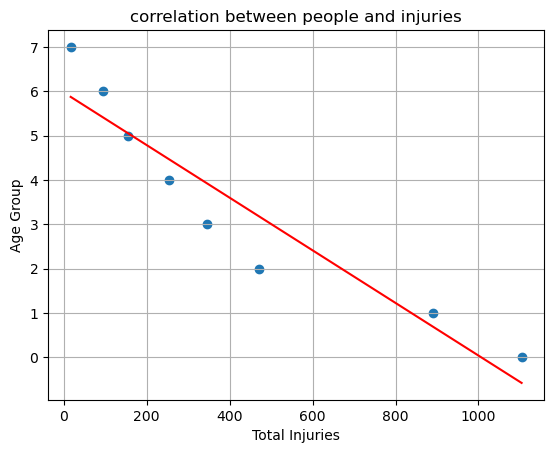

In [28]:
# Linear regression for correlation between people and injuries
x_values = merged_df['Total Injuries']
y_values = merged_df.index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-10), fontsize=15,color="red")

plt.grid()
plt.xlabel('Total Injuries')
plt.ylabel('Age Group')
plt.title('correlation between people and injuries')
print(f"The r-value is: {rvalue**2}")
print(f"The p-value is: {pvalue**2}")
plt.savefig("output/people and injuries.png")
plt.show()

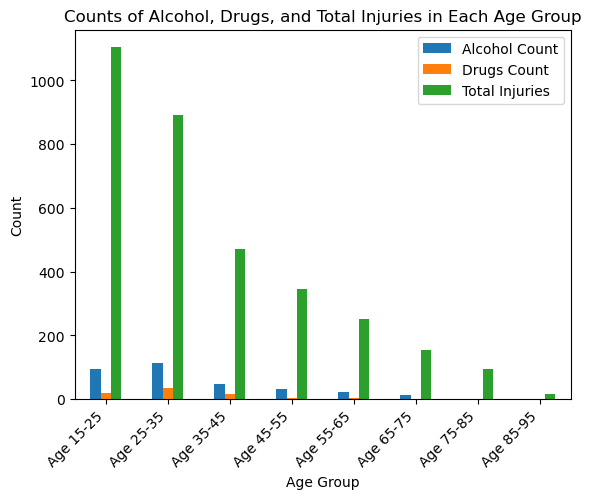

In [29]:
#Generate a bar plot showing the total number of Alcohol, Drugs, and Total Injuries in Each Age Group
Figure_age_injuries = merged_df[["Alcohol Count", "Drugs Count", "Total Injuries"]].plot(
    kind="bar", xlabel="Age Group", ylabel="Count", rot=0)

x_set = [str(age_group) for age_group in merged_df["AgeGroup"].unique()]
tick_locations = range(len(x_set))
plt.xticks(tick_locations, x_set, rotation=45, ha="right") 
plt.title("Counts of Alcohol, Drugs, and Total Injuries in Each Age Group")
plt.savefig("output/age and alcohol.png")
plt.show()

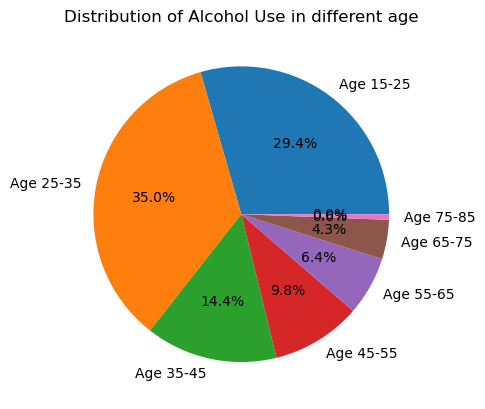

In [30]:
# Generate a pie plot showing the distribution of alcohol use in different age
labels_group = merged_df["AgeGroup"]
collect_data_pie = merged_df["Alcohol Count"]
Figure1 = collect_data_pie.plot(kind="pie", autopct='%1.1f%%', labels=labels_group, ylabel="")
plt.title('Distribution of Alcohol Use in different age')
plt.savefig("output/Distribution of Alcohol Use in different age.png")
plt.show()

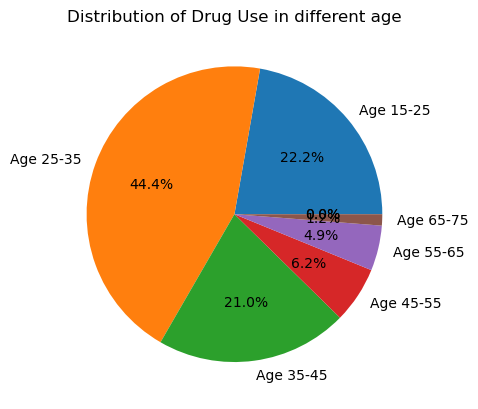

In [31]:
# Generate a pie plot showing the distribution of alcohol use in different age
labels_group = merged_df["AgeGroup"]
collect_data_pie = merged_df["Drugs Count"]
Figure1 = collect_data_pie.plot(kind="pie", autopct='%1.1f%%', labels=labels_group, ylabel="")
plt.title('Distribution of Drug Use in different age')
plt.savefig("output/ Drug Use in different age.png")
plt.show()

In [32]:
colission_group=hospital_data.groupby("Collision_Manner").count()
colission_group

NameError: name 'hospital_data' is not defined

In [33]:
#Generate a bar plot showing The reason of accidents
Figure_age_injuries = colission_group["Street_Name"].plot(
    kind="bar", xlabel="Collision Manner", ylabel="Accident Count", rot=0)

x_set =colission_group.index
tick_locations = range(len(x_set))
plt.xticks(tick_locations, x_set, rotation=45, ha="right") 
plt.title("The reason of accidents")
plt.savefig("output/collision reason.png")
plt.show()

NameError: name 'colission_group' is not defined

In [34]:
weather_condition=crash_data.groupby("Weather").count()["Incident_ID"]
weather_condition

Weather
Clear             6616
Cloudy             592
Fog Smog Smoke       3
Rain               192
Unknown            187
Name: Incident_ID, dtype: int64

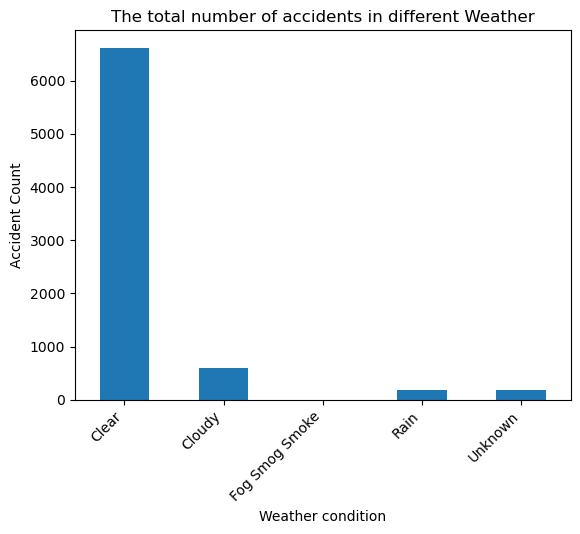

In [35]:
#Generate a bar plot showing the total number of accidents in different light condition
Figure_age_injuries = weather_condition.plot(
    kind="bar", xlabel="Weather condition", ylabel="Accident Count", rot=0)

x_set =weather_condition.index
tick_locations = range(len(x_set))
plt.xticks(tick_locations, x_set, rotation=45, ha="right") 
plt.title("The total number of accidents in different Weather")
plt.savefig("output/Weather condition.png")
plt.show()

In [36]:
Surface_Condition=crash_data.groupby("Surface_Condition").count()["Incident_ID"]
Surface_Condition

Surface_Condition
Dry                      7292
Mud Dirt Gravel             1
Unknown                    30
Water Standing Moving       2
Wet                       265
Name: Incident_ID, dtype: int64

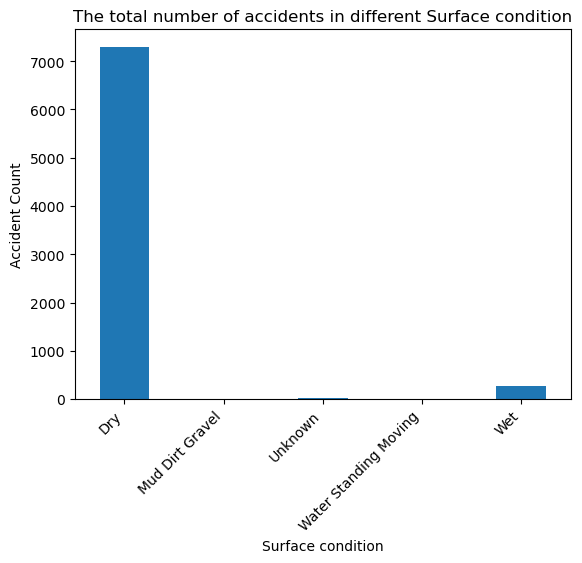

In [37]:
#Generate a bar plot showing the total number of accidents in different light condition
Figure_age_injuries = Surface_Condition.plot(
    kind="bar", xlabel="Surface condition", ylabel="Accident Count", rot=0)

x_set =Surface_Condition.index
tick_locations = range(len(x_set))
plt.xticks(tick_locations, x_set, rotation=45, ha="right") 
plt.title("The total number of accidents in different Surface condition")
plt.savefig("output/surface condition.png")
plt.show()

In [38]:
light_Condition=crash_data.groupby("Light_Condition").count()["Incident_ID"]
light_Condition

Light_Condition
Dark Lighted             1754
Dark Not Lighted           33
Dark Unknown Lighting       9
Dawn                       81
Daylight                 5347
Dusk                      237
Unknown 51                129
Name: Incident_ID, dtype: int64

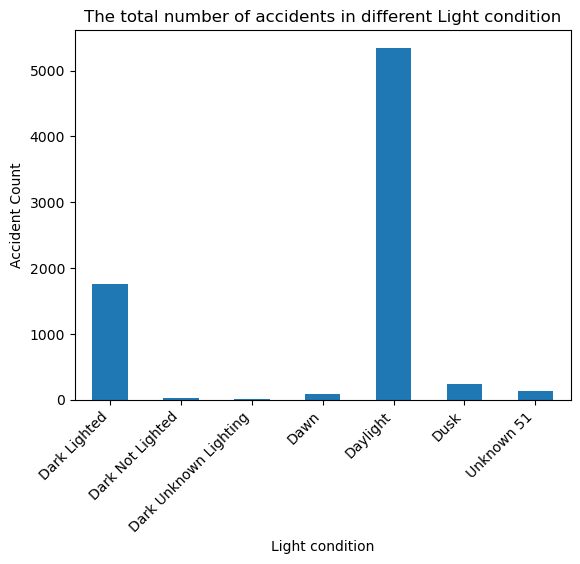

In [39]:
#Generate a bar plot showing the total number of accidents in different light condition
Figure_age_injuries = light_Condition.plot(
    kind="bar", xlabel="Light condition", ylabel="Accident Count", rot=0)

x_set =light_Condition.index
tick_locations = range(len(x_set))
plt.xticks(tick_locations, x_set, rotation=45, ha="right") 
plt.title("The total number of accidents in different Light condition")
plt.savefig("output/light condition.png")
plt.show()

In [40]:
#now we can find nearest hospital to know that which hospital should have better facilities as emergency.
# Use the Pandas copy function to create DataFrame called hospital to store the streetname, collisionmanner,CrossStreet
hospital_data=crash_data[["Street_Name", "Light_Condition", "Collision_Manner", "Latitude", "Longitude", "Age_1"]].copy()

# Add an empty column, "hospital Name," to the DataFrame so you can store the hospital found using the Geoapify API
hospital_data["Hospital Name"]= ""

# Display sample data
hospital_data

,Street_Name,Light_Condition,Collision_Manner,Latitude,Longitude,Age_1,Hospital Name
0,Broadway Rd,Dark Lighted,Sideswipe Same Direction,33.407390,-111.940150,36.0,
1,Baseline Rd,Daylight,Angle - Other Than Left Turn 2,33.378300,-111.967380,27.0,
2,University Dr,Dusk,Left Turn,33.422030,-111.925660,28.0,
3,McClintock Dr,Dark Lighted,Left Turn,33.378420,-111.909260,72.0,
4,Baseline Rd,Daylight,Rear End,33.378460,-111.893710,36.0,
...,...,...,...,...,...,...,...
7585,Broadway Rd,Dusk,Rear End,33.407394,-111.952407,19.0,
7586,Ash Ave,Dark Lighted,Sideswipe Opposite Direction,33.431508,-111.943378,17.0,
7587,Elliot Rd,Unknown 51,Left Turn,33.349081,-111.965928,28.0,
7588,Mill Ave,Daylight,Other,33.393137,-111.939610,23.0,


In [43]:
# Set parameters to search for a hospital
# Import API key
from api_keys import geoapify_key
radius = 1000
params = {
    "apiKey": geoapify_key,
    "categories": "healthcare.hospital"
}

# Print a message to follow up the hospital search
print("Starting hospital search")

# Iterate through the hotel_df DataFrame
for index, row in hospital_data.iterrows():
    
    # get latitude, longitude from the DataFrame
    latitude =hospital_data.loc[index, "Latitude"]
    longitude =hospital_data.loc[index, "Longitude"]
  
    
    # Add filter and bias parameters with the current location's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{longitude},{latitude},{radius}"
    params["bias"] = f"proximity:{longitude},{latitude}"
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places?"


    # Make and API request using the params dictionaty
    name_address_1 = requests.get(base_url, params=params)
    
    # Convert the API response to JSON format
    name_address = name_address_1.json()
    
    # Grab the first hospital from the results and store the name in the hospital name DataFrame
    try:
        hospital_data.loc[index, "Hospital Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        #If no hospital is found, set the hospital name as "No hopital found".
        hospital_data.loc[index, "Hospital Name"] = "No hospital found"
        
    # Log the search results
    print(f"{hospital_data.loc[index, 'Street_Name']} - nearest hospital: {hospital_data.loc[index, 'Hospital Name']}")

# Display sample data
hospital_data

Starting hospital search
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
Baseline Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: Laser Surgery Center
McClintock Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Wildermuth Ave - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Baseline Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
3rd St - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Souther

Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
Apache Blvd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: Laser Surgery Center
Rio Salado Pkwy - nearest hospital: No hospital found
McClintock Dr - nearest hospital: Laser Surgery Center
Baseline Rd - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
University Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
University Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No 

Rural Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Price Rd - nearest hospital: Laser Surgery Center
Scottsdale Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Pointe Pkwy - 

Southern Ave - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Rural Rd - nearest hospital: Aurora East
Rio Salado Pkwy - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: Laser Surgery Center
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Kyrene Rd - nearest hospital: Aurora East
Rural Rd - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
McKe

Priest Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Guadalupe Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
Scottsdale Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No 

Scottsdale Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: Aurora East
University Dr - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Stanley Pl - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: Aurora East
Broadway Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
University Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: Aurora East
Rural Rd - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Baseline Rd - nearest hospital: No hospital found
Mill Ave - n

Broadway Rd - nearest hospital: Tempe St. Luke Hospital
Broadway Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
University Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Rural Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Broadway Rd - nearest hosp

McKemy St - nearest hospital: No hospital found
Washington St - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Veterans Way - nearest hospital: No hospital found
McClintock Dr - nearest hospital: Laser Surgery Center
Priest Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Miller Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
McClintock Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Warner Rd - neares

Smith Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Price Rd - nearest hospital: Laser Surgery Center
Price Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Avenida Del Yaqui - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
6th St - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Broadway Rd - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital 

Priest Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Curry Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
Rio Salado Pkwy - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Grove Pkwy - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: Laser Surgery Center
Baseline Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Rural Rd - nearest hospital: Aurora East
Elliot Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found


McClintock Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: Aurora East
Southern Ave - nearest hospital: Laser Surgery Center
Baseline Rd - nearest hospital: No hospital found
Guadalupe Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: Aurora East
Baseline Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Price Rd - nearest hospi

Priest Dr - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Hayden Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
13th St - nearest hospital: Tempe St. Luke Hospital
Price Rd - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: Aurora East
56th St - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
College Ave - nearest hospital: Aurora East
Warner Rd - nearest hospital: No hospital found
Guadalupe Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: Laser Surgery Center
Elliot Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
McClintock Dr - neare

Scottsdale Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Grove Pkwy - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Rural Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Knox Rd - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
G

Broadway Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
6th St - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Lemon St - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
College Ave - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Grove Pkwy - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Dorsey Ln - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
University

McClintock Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Harl Ave - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: Laser Surgery Center
Rural Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: Laser Surgery Center
Broadway Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
McClintock Dr - nearest hospital: No hospital found
Carson Dr - nearest hospital: No hospital found
21st St - nearest hospital: Tempe St. Luke Hospital
McClintock Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: E

Rural Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Broadway Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Hohokam Dr - nearest hospital: No hospital found
Curry Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Southern Ave - nearest hospital: Laser Surgery Center
Elliot Rd - nearest hospital: No hospital found
McC

Rio Salado Pkwy - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Country Club Way - nearest hospital: Laser Surgery Center
48th St - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Apache Blvd - nearest hospital: Tempe St. Luke Hospital
University Dr - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
McClintock Dr - nearest hospital: Laser Surgery Center
Priest Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Rural Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Rural Rd - neares

Elliot Rd - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: No hospital found
Darrow Dr - nearest hospital: No hospital found
Carson Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: Aurora East
McClintock Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Playa Del Norte Dr - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
Price Rd - nearest hospital: Laser Surgery Center
Fairmont Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: Laser Surgery Center
Priest Dr - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital fo

Baseline Rd - nearest hospital: No hospital found
George Dr - nearest hospital: Banner Desert Medical Center
Smith Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
Curry Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
5th St - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General

Rio Salado Pkwy - nearest hospital: No hospital found
Los Arboles Dr - nearest hospital: No hospital found
Warner Rd - nearest hospital: Dignity Health Arizona Specialty Hospital
Broadway Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Dava Dr - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
5th St - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Roosevelt St - nearest hospital: Tempe St. Luke Hospital
Scottsdale Rd - nea

Elliot Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
College Ave - nearest hospital: Tempe St. Luke Hospital
Guadalupe

Mill Ave - nearest hospital: Tempe St. Luke Hospital
Warner Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
6th St - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Curry Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Guadalupe Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hospita

McClintock Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
1st St - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
River Pkwy - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Veterans Way - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
Priest Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Baseline Rd - nearest hospital: Emergency Room at Ari

River Pkwy - nearest hospital: Dignity Health Arizona Specialty Hospital
McKellips Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Washington St - nearest hospital: No hospital found
McKellips Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Perry Ln - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
Rio Salado Pkwy - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Price Rd - nearest hospi

Priest Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: Laser Surgery Center
Elliot Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Baseline Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
48th St - nearest hospital: No hospital found
Southern Ave - nearest hospital: Laser Surgery Center
University Dr - nearest hospital: Tempe St. Luke Hospital
Lemon St - nearest hospital: No hospital found

Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Priest Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Rural Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Guadalupe Rd - nearest hospital: Aurora East
Priest Dr - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
Kyrene Rd - nearest hospital: Aurora East
Baseline Rd - nearest hospital: No hospital found
McKemy St - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Broadway Rd - nearest hospital: 

Broadway Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
University Dr - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Baseline Rd - nearest hospital: No hospital found
Apache Blvd - nearest hospital: Tempe St. Luke Hospital
University Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Hancock Ave - nearest hospital: No hospital found
Ash Ave - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Los Feliz Dr - nearest hospital: Laser Surgery Center
Broadway Rd - nearest hospital: No hospital found
W 7th St - nearest hospital: No hospital found
Southern Ave - neare

Elliot Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: Laser Surgery Center
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Terrace Rd - nearest hospital: No hospital found
Broadway Rd -

McClintock Dr - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Lakeshore Dr - nearest hospital: Emergency Room at Arizona General Hospital
Priest Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Packard Dr - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
48th St - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
College Ave - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital:

Broadway Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: Laser Surgery Center
Warner Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Farmer Ave - nearest hospital: Tempe St. Luke Hospital
Rural Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
Rural Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
Apache Blvd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No

Rural Rd - nearest hospital: Aurora East
University Dr - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Orange St - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Lemon St - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Hohokam Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Elliot Rd -

Terrace Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
Broadway Rd - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
College Ave - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Hardy Dr - nearest hospital: Tempe St. Luke Hospital
Mill Ave - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
McClintock Dr - nearest hospital: No hospital found
56th St - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital fou

Scottsdale Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
College Ave - nearest hospital: Tempe St. Luke Hospital
University Dr - nearest hospital: Tempe St. Luke Hospital
Baseline Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
Broadway Rd - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: Aurora East
Rural Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Weber Dr - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
M

Broadway Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
Scottsdale Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
5th St - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Lemon St - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
Baseline Rd - nearest hospital: No hospital found
Guadalupe Rd - nearest hospital: No hospital found
Elli

Rio Salado Pkwy - nearest hospital: No hospital found
56th St - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
5th St - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
56th St - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
8th St - nearest hospital: No hospital found
Lemon St - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Guadalupe Rd - nearest hospital: No hospital found
Rio Salado Pkwy - 

University Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
I-10 Exit 155 G-Ramp - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Baseline Rd - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Rural Rd - nearest hospital: No hospital found
Ash Ave - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
SR-202 Exit 7 A-Ramp - nearest hospital: No hospital found
SR-202 Exit 5 J-Ramp - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Elli

Apache Blvd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Lodge Dr - nearest hospital: Aurora East
University Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
I-10 Exit 155 J1-Ramp - nearest hospital: No hospital found
SR-202 Exit 7 T-Ramp - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
Baseline Rd - nearest hospital: No hospital found
SR-101 Non-Cardinal Frontage - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
52nd St - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Baseline Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
Ellio

Baseline Rd - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Guadalupe Rd - nearest hospital: Aurora East
Southern Ave - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
Hardy Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Priest Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
McClintock Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Kyrene Rd - neares

Elliot Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
I-10 Exit 157 C-Ramp - nearest hospital: No hospital found
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
Broadway Rd - nearest hospital: No hospital found
Packard Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Scottsdale Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Washington St - nearest hospital: No hospital found
Perry Ln - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Palmcroft Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Orange St - nearest hospital: No hospital

Mill Ave - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Price Rd - nearest hospital: Laser Surgery Center
McClintock Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
College Ave - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
15th St - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Calle Los Cerros - nearest hospital: No hospital found
Southern Ave - nearest hospital: Banner Desert Medical Center
Southern Ave - nearest hospital: No hospital found
Price Rd - nearest hospital: Laser Surgery Center
McClintock Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe S

Rural Rd - nearest hospital: Aurora East
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Curry Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: Laser Surgery Center
Kyrene Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
US-60 Exit 172 C2-Ramp - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
48th St - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: Laser Surgery

Baseline Rd - nearest hospital: No hospital found
SR-202 Exit 7 T-Ramp - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
5th St - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Smith Rd - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Priest Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
I-10 Exit 153 X-Ramp - nearest hospital: No hospital found
Parkside Dr - nearest hospital: No hospital found
Center Pkwy - nearest hospital: No hosp

SR-202 Exit 7 T-Ramp - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
Price Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: Aurora East
Rural Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
SR-101 Cardinal Frontage - nearest hospital: Laser Surgery Center
Baseline Rd - nearest hospital: No hospital found
Guadalupe Rd - nearest hospital: No hospital found
US-60 Exit 172 C2-Ramp - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
McClintock 

13th St - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Beck Ave - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
University Dr - nearest hospital: Tempe St. Luke Hospital
McClintock Dr - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
52nd St - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Guadalupe Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
5th St - nearest hospital: No hospital found
Baseline Rd - nearest hospital: E

University Dr - nearest hospital: Tempe St. Luke Hospital
Mill Ave - nearest hospital: Tempe St. Luke Hospital
College Ave - nearest hospital: Tempe St. Luke Hospital
Southern Ave - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: Laser Surgery Center
Southern Ave - nearest hospital: Banner Desert Medical Center
Apache Blvd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Sr-143 - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Guadalupe Rd - nearest hospital: 

Priest Dr - nearest hospital: No hospital found
Farmer Ave - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
56th St - nearest hospital: No hospital found
Curry Rd - nearest hospital: No hospital found
SR-143 Non-Cardinal - nearest hospital: No hospital found
Lakeshore Dr - nearest hospital: Emergency Room at Arizona General Hospital
Priest Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
US-60 Exit 174 C-Ramp - nearest hospital: Emergency Room at Arizona General Hospital
University Dr - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Sr-143 - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Scottsdale Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No ho

University Dr - nearest hospital: Tempe St. Luke Hospital
McClintock Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Guadalupe Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Dorsey Ln - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
S Athletes Pl - nearest hospital: No hospital found
Emerald Dr - nearest hospital

,Street_Name,Light_Condition,Collision_Manner,Latitude,Longitude,Age_1,Hospital Name
0,Broadway Rd,Dark Lighted,Sideswipe Same Direction,33.407390,-111.940150,36.0,Tempe St. Luke Hospital
1,Baseline Rd,Daylight,Angle - Other Than Left Turn 2,33.378300,-111.967380,27.0,No hospital found
2,University Dr,Dusk,Left Turn,33.422030,-111.925660,28.0,No hospital found
3,McClintock Dr,Dark Lighted,Left Turn,33.378420,-111.909260,72.0,No hospital found
4,Baseline Rd,Daylight,Rear End,33.378460,-111.893710,36.0,No hospital found
...,...,...,...,...,...,...,...
7585,Broadway Rd,Dusk,Rear End,33.407394,-111.952407,19.0,No hospital found
7586,Ash Ave,Dark Lighted,Sideswipe Opposite Direction,33.431508,-111.943378,17.0,No hospital found
7587,Elliot Rd,Unknown 51,Left Turn,33.349081,-111.965928,28.0,No hospital found
7588,Mill Ave,Daylight,Other,33.393137,-111.939610,23.0,No hospital found


In [44]:
import hvplot.pandas as hvplot

# Filter out rows where 'Hospital Name' is 'No hospital found'
filtered_hospitals = hospital_data[hospital_data["Hospital Name"] != "No hospital found"]

# Extract 'Hospital Name' for color mapping
Hospital = filtered_hospitals["Hospital Name"]

# Configure the map plot
map_plot = filtered_hospitals.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles="OSM",
    frame_width=700,
    frame_height=500,
    scale=0.07,
    color=Hospital
)



# Display the filtered map
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (_color)

In [87]:
sampled_hospitals.groupby("Hospital Name").count()[["Street_Name","Age_1"]]

,Street_Name,Age_1
Hospital Name,,
Aurora East,13,13
Banner Desert Medical Center,2,2
Dignity Health Arizona Specialty Hospital,1,1
Emergency Room at Arizona General Hospital,16,16
Laser Surgery Center,7,7
No hospital found,438,438
Tempe St. Luke Hospital,23,23
